<h1><center> Data Management & Visualization of Pizza Restaurants data from Yelp API</center></h1>

### Importing necessary libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Using API Key from Yelp, retrieve data
Retrieve 150 pizza restaurant data then turn JSON response to dataframes for easy manipulation.

In [2]:
YELP_API_KEY = "yeEGO5mXa5TyCAiDKP-Q3PNXT30DoGUtlZ_yBq-jWiFXdcBbiAQlEDz-TtFFLUrpuJDBzLVkUC35MYlf5vIiWdSk15iNSBianns-ROtNleaoNEo1dvEjPnyem50PX3Yx"
headers = {'Authorization': f'Bearer {YELP_API_KEY}'}

def find_restaurants(loc, headers):
    response = requests.get(f'https://api.yelp.com/v3/businesses/search?term=\"pizza\"&location=\"{loc}\"&limit=50', headers=headers)
    df_new = pd.DataFrame.from_dict(response.json()['businesses'])
    response = requests.get(f'https://api.yelp.com/v3/businesses/search?term=\"pizza\"&location=\"{loc}\"&limit=50&offset=51', headers=headers)
    df_new = df_new.append(pd.DataFrame.from_dict(response.json()['businesses']), sort=True)
    response = requests.get(f'https://api.yelp.com/v3/businesses/search?term=\"pizza\"&location=\"{loc}\"&limit=50&offset=101', headers=headers)
    df_new = df_new.append(pd.DataFrame.from_dict(response.json()['businesses']), sort=True)
    return df_new

### Clean data
Drop nan values in rating and show data acquired

In [3]:
restaurants = []
for l in ('Los Angeles', 'New York City', 'Houston', 'Chicago', 'Phoenix'):
    restaurants.append(find_restaurants(l, headers))
for r in restaurants:
    r.dropna(subset=['rating'], inplace=True)
LA_restaurants, NY_restaurants, HO_restaurants, CH_restaurants, PH_restaurants = (r for r in restaurants)

In [4]:
LA_restaurants.head(10)

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,desano-pizza-bakery-los-angeles,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.0910099739038, 'longitude': -1...",(323) 913-7000,3928.573261,fD4ntpbf92ufSHn5tSmSxA,https://s3-media3.fl.yelpcdn.com/bphoto/p2_rIZ...,False,"{'address1': '4959 Santa Monica Blvd', 'addres...",DeSano Pizza Bakery,+13239137000,$$,4.5,1219,"[delivery, pickup]",https://www.yelp.com/biz/desano-pizza-bakery-l...
1,l-antica-pizzeria-da-michele-los-angeles-2,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.0990631, 'longitude': -118.337...",(323) 366-2408,4421.681671,88kri8FhXy8b3DQ_QjSMmQ,https://s3-media2.fl.yelpcdn.com/bphoto/SCuuHj...,False,"{'address1': '1534 N McCadden Pl', 'address2':...",L'Antica Pizzeria Da Michele,+13233662408,$$,4.5,555,"[delivery, pickup]",https://www.yelp.com/biz/l-antica-pizzeria-da-...
2,786-degrees-los-angeles-5,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.230374, 'longitude': -118.402612}",(818) 939-6566,20201.919303,2LL5lILqX7zhxrD0KvdKpg,https://s3-media1.fl.yelpcdn.com/bphoto/XHF5Ph...,False,"{'address1': '8879 Laurel Canyon Blvd', 'addre...",786 Degrees,+18189396566,$$,5.0,2086,[delivery],https://www.yelp.com/biz/786-degrees-los-angel...
3,pizza-go-los-angeles,"[{'alias': 'pizza', 'title': 'Pizza'}]","{'latitude': 34.06879, 'longitude': -118.30574}",(213) 381-5131,1661.125903,sOQnBawL11YPis45ddDghA,https://s3-media3.fl.yelpcdn.com/bphoto/hMojvz...,False,"{'address1': '4200 W 3rd St', 'address2': '', ...",Pizza Go,+12133815131,$$,4.0,285,"[delivery, pickup]",https://www.yelp.com/biz/pizza-go-los-angeles?...
4,pizzeria-mozza-los-angeles,"[{'alias': 'pizza', 'title': 'Pizza'}]","{'latitude': 34.083107, 'longitude': -118.338883}",(323) 297-0101,2885.110877,q8buTNBt3FU9vie0D5OOxA,https://s3-media1.fl.yelpcdn.com/bphoto/rCvc5M...,False,"{'address1': '641 N Highland Ave', 'address2':...",Pizzeria Mozza,+13232970101,$$,4.0,4248,[delivery],https://www.yelp.com/biz/pizzeria-mozza-los-an...
5,masa-of-echo-park-los-angeles,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 34.077585, 'longitude': -118.259599}",(213) 989-1558,5962.124764,CbW8U0QAwh5XRkaLt0xNZA,https://s3-media3.fl.yelpcdn.com/bphoto/k8LDtp...,False,"{'address1': '1800 W Sunset Blvd', 'address2':...",Masa of Echo Park,+12139891558,$$,4.0,4177,[delivery],https://www.yelp.com/biz/masa-of-echo-park-los...
6,koreatown-pizza-company-los-angeles-2,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.0613398, 'longitude': -118.311...",(213) 738-0077,924.002215,clJmJd_tbaK34j1CN-9MYQ,https://s3-media2.fl.yelpcdn.com/bphoto/Kaapls...,False,"{'address1': '3900 Wilshire Blvd', 'address2':...",Koreatown Pizza Company,+12137380077,$$,4.0,312,"[delivery, pickup]",https://www.yelp.com/biz/koreatown-pizza-compa...
7,ghost-pizza-kitchen-los-angeles,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.0839, 'longitude': -118.35864}",(323) 653-9993,4241.922970,hSMYsvVBZ70pIYiUa3yzyA,https://s3-media4.fl.yelpcdn.com/bphoto/lhX2ak...,False,"{'address1': '7751 1/2 Melrose Ave', 'address2...",Ghost Pizza Kitchen,+13236539993,NaN,4.5,201,"[delivery, pickup]",https://www.yelp.com/biz/ghost-pizza-kitchen-l...
8,braazo-pizza-los-angeles,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.0438886, 'longitude': -118.251...",(213) 622-3390,6715.720715,T1RfgUMYKW3HD55SEJILbQ,https://s3-media2.fl.yelpcdn.com/bphoto/vSVuZy...,False,"{'address1': '100 1/2 W 7th St', 'address2': '...",Braazo Pizza,+12136223390,$$,4.5,598,"[delivery, pickup]",https://www.yelp.com/biz/braazo-pizza-los-ange...
9,village-pizzeria-los-angeles,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 34.07395, 'longitude': -118.323956}",(323) 465-5566,1394.740156,egU533_tWCiKYA_2vVGFsw,https://s3-media2.fl.yelpcdn.com/bphoto/4ssGqj...,False,"{'addre

### VIsualize city vs average pizza restaurant ratings

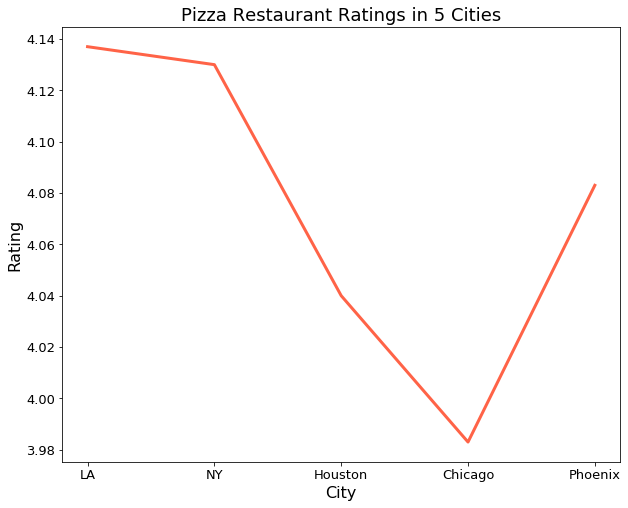

In [5]:
rating = []
for r in restaurants:
    rating.append(round(r['rating'].mean(), 3))
plt.figure(figsize=(10,8))
plt.title('Pizza Restaurant Ratings in 5 Cities', size=18)
plt.xlabel('City', size=16)
plt.ylabel('Rating', size=16)
plt.plot(['LA', 'NY', 'Houston', 'Chicago', 'Phoenix'], rating, linewidth=3, color='tomato')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()